# Testing Summarizer

This notebook is for testing and experimenting with the Gemini-based text summarizer.

In [1]:
import os
import sys
sys.path.append('..')
from src.summarizer import Summarizer

/Users/alexbadin/miniconda3/envs/llm_cloud/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize the summarizer
api_key = os.environ.get('GEMINI_API_KEY')
if not api_key:
    raise ValueError("Please set GEMINI_API_KEY environment variable")

summarizer = Summarizer(api_key)

## Test with Russian Text

Since our main use case is Russian text, let's test with a Russian sample:

In [5]:
russian_text = """
В последние годы искусственный интеллект становится все более важной частью нашей жизни.
Технологии машинного обучения применяются в различных областях, от медицины до образования.
Многие эксперты считают, что это только начало технологической революции.
Важно внимательно следить за развитием этих технологий и их влиянием на общество.
"""
max_symbols = 500
summary, is_digest = summarizer.summarize(russian_text, max_symbols=max_symbols)

print("Original text:")
print(russian_text)
print(f"\nSummary ({max_symbols} symbols):")
print(f"\nIs digest: {is_digest}")
print(summary)


Original text:

В последние годы искусственный интеллект становится все более важной частью нашей жизни.
Технологии машинного обучения применяются в различных областях, от медицины до образования.
Многие эксперты считают, что это только начало технологической революции.
Важно внимательно следить за развитием этих технологий и их влиянием на общество.


Summary (500 symbols):

Is digest: False
Искусственный интеллект и машинное обучение стремительно развиваются, внедряясь в медицину, образование и другие сферы.  Эксперты предвидят масштабную технологическую революцию.  Важно отслеживать развитие ИИ и его социальные последствия.


## corpus of texts analysis


In [7]:
import pandas as pd
data_path = '/Users/alexbadin/Library/CloudStorage/GoogleDrive-alex.badin@gmail.com/My Drive/Colab Notebooks/Narratives/TG_messages'
# Get all pickle files in the directory
import glob

# Initialize an empty list to store dataframes
dfs = []

# Find all pickle files in the directory
pickle_files = glob.glob(os.path.join(data_path, '*.pkl'))

# Read and combine all pickle files
for file in pickle_files:
    with open(file, 'rb') as f:
        df_temp = pd.read_pickle(f)
        dfs.append(df_temp)

# Concatenate all dataframes
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(43856, 39)


,index,_,peer_id,date,message,out,mentioned,media_unread,silent,post,...,restriction_reason,ttl_period,cleaned_message,summary,embeddings,channel,stance,action,values,id
0,0.0,Message,"{'_': 'PeerChannel', 'channel_id': 1407902266}",2023-10-10 19:08:34+00:00,17-ого октября в 15:45 в Московском городском ...,False,False,False,False,True,...,[],None,17-ого октября в 15:45 в Московском городском ...,17-ого октября в 15:45 в Московском городском ...,"[-0.021188057959079742, 0.010992590337991714, ...",strelkovii,voenkor,NaN,NaN,NaN
1,1.0,Message,"{'_': 'PeerChannel', 'channel_id': 1407902266}",2023-10-12 14:27:29+00:00,Эфир председателя Центрального совета Русского...,False,False,False,False,True,...,[],None,Эфир председателя Центрального совета Русского...,Эфир председателя Центрального совета Русского...,"[-0.020297301933169365, 0.004881671164184809, ...",strelkovii,voenkor,NaN,NaN,NaN
2,2.0,Message,"{'_': 'PeerChannel', 'channel_id': 1407902266}",2023-10-14 15:32:50+00:00,"Икона Божьей Матери, написана 14.10.2016. Миро...",False,False,False,False,True,...,[],None,"Икона Божьей Матери, написана 14.10.2016. Миро...","Икона Божьей Матери, написана 14.10.2016. Миро...","[-0.00942696537822485, -0.021588075906038284, ...",strelkovii,voenkor,NaN,NaN,NaN
3,3.0,Message,"{'_': 'PeerChannel', 'channel_id': 1407902266}",2023-10-02 16:09:03+00:00,"Дорогие друзья, 7 октября, в субботу, в 17:00 ...",False,False,False,False,True,...,[],None,"Дорогие друзья, 7 октября, в субботу, в 17:00 ...",Встречу начнём с фильма про Игоря Ивановича «С...,"[-0.015948306769132614, -0.027243398129940033,...",strelkovii,voenkor,NaN,NaN,NaN
4,4.0,Message,"{'_': 'PeerChannel', 'channel_id': 1407902266}",2023-10-07 17:41:36+00:00,"Игорь всегда цитирует: «Делай, что должен, и б...",False,False,False,False,True,...,[],None,"Игорь всегда цитирует: «Делай, что должен, и б...","17 октября апелляция, мы тщательно готовимся к...","[-0.032007887959480286, -0.009203588590025902,...",strelkovii,voenkor,NaN,NaN,NaN


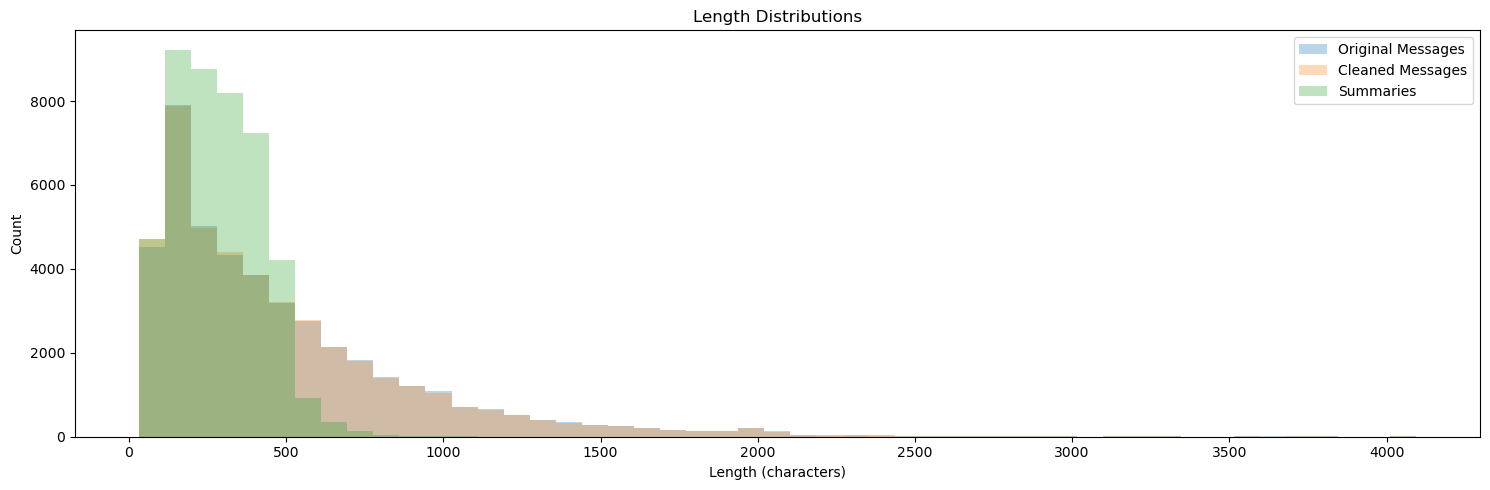


Length Statistics:
            Message  Cleaned Message       Summary
count  43856.000000     43856.000000  43856.000000
mean     496.285594       489.952184    282.727198
std      446.766960       440.069389    139.100208
min       31.000000        31.000000     31.000000
25%      176.000000       174.000000    167.000000
50%      365.000000       361.500000    272.000000
75%      661.000000       651.000000    383.000000
max     4094.000000      4094.000000   1935.000000


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate lengths
df['message_length'] = df['message'].str.len()
df['cleaned_message_length'] = df['cleaned_message'].str.len() 
df['summary_length'] = df['summary'].str.len()

# Create figure
plt.figure(figsize=(15, 5))

# Calculate common bin edges based on all data
all_lengths = pd.concat([
    df['message_length'].dropna(),
    df['cleaned_message_length'].dropna(),
    df['summary_length'].dropna()
])
min_val = all_lengths.min()
max_val = all_lengths.max()
bins = np.linspace(min_val, max_val, 50)

# Plot histograms overlaid with common bins
plt.hist(df['message_length'].dropna(), bins=bins, alpha=0.3, label='Original Messages')
plt.hist(df['cleaned_message_length'].dropna(), bins=bins, alpha=0.3, label='Cleaned Messages')
plt.hist(df['summary_length'].dropna(), bins=bins, alpha=0.3, label='Summaries')

plt.title('Length Distributions')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nLength Statistics:")
stats_df = pd.DataFrame({
    'Message': df['message_length'].describe(),
    'Cleaned Message': df['cleaned_message_length'].describe(), 
    'Summary': df['summary_length'].describe()
})
print(stats_df)


In [23]:
df[['message_length', 'cleaned_message_length', 'summary_length']].isna().sum()

message_length            0
cleaned_message_length    0
summary_length            0
dtype: int64

## Test with Sample Texts

In [12]:
from tqdm import tqdm
# Get random sample of 15 rows
df_sample = df.sample(n=15)[['cleaned_message', 'summary']]

# Generate summaries and digest flags using summarizer
summaries = []
is_digest_flags = []

for text in tqdm(df_sample['cleaned_message']):
    summary, is_digest = summarizer.summarize(text)
    summaries.append(summary)
    is_digest_flags.append(is_digest)

# Add new columns
df_sample['gemini_summary'] = summaries
df_sample['is_digest'] = is_digest_flags

100%|██████████| 15/15 [00:15<00:00,  1.00s/it]


In [14]:
df_sample.to_clipboard()

In [9]:
sample_texts = df.news.sample(10).tolist()

summaries = {'original': [], 'summary': []}

for text in sample_texts:
    summary = summarizer.summarize(text, max_sentences=2)
    summaries['original'].append(text)
    summaries['summary'].append(summary)

In [11]:
pd.DataFrame(summaries).to_clipboard()


## Test with Sample Text

In [5]:
sample_text = """
This is a sample text that we'll use to test our summarizer.
It contains multiple sentences with various information.
We want to see how well the summarizer captures the main points.
The summary should be concise but maintain the key information.
Let's see how it performs with this test case.
"""

print("Original text:")
print(sample_text)
print("\nSummary (2 sentences):")
print(summarizer.summarize(sample_text, max_sentences=2))

Original text:

This is a sample text that we'll use to test our summarizer.
It contains multiple sentences with various information.
We want to see how well the summarizer captures the main points.
The summary should be concise but maintain the key information.
Let's see how it performs with this test case.


Summary (2 sentences):
The goal of this text summarizer is to capture the main points of a given text and create a concise, meaningful summary. It aims to maintain the original meaning and highlight the most important information.


## Test with Different Lengths

In [ ]:
def test_different_lengths(text):
    for sentences in [1, 2, 3]:
        print(f"\nSummary with {sentences} sentence{'s' if sentences > 1 else ''}:")
        print(summarizer.summarize(text, max_sentences=sentences))

test_different_lengths(sample_text)

## Test with Your Own Text

You can paste your text in the variable below and run the cell to test the summarizer:

In [ ]:
your_text = """Paste your text here..."""

print("Summary (2 sentences):")
print(summarizer.summarize(your_text, max_sentences=2))